In [ ]:
import os

print(os.getcwd())

directory_list = ['Billiard-objects-detection.v2i.voc', 'Billiard-objects-detection.v2i.tfrecord', 'frames', 'detected_images']


cwdir_listdir = os.listdir()
for dir in directory_list:
    if dir not in cwdir_listdir:
        os.mkdir(dir)
    else:
        print('This directory is already created')


print(os.listdir())

/content
['.config', 'Billiard-objects-detection.v2i.voc', 'frames', 'detected_images', 'Billiard-objects-detection.v2i.tfrecord', 'sample_data']


In [ ]:
# First zip file has is pascal voc format from Roboflow
# In this format each image has its own xml file to process

from IPython.core.display import clear_output
drive = "https://drive.google.com/file/d/1RFK6VnWVk7KGSU5yZrO30hyHECizxtxz/view?usp=sharing"

file_id = "1RFK6VnWVk7KGSU5yZrO30hyHECizxtxz"

os.chdir("/content/Billiard-objects-detection.v2i.voc")

!gdown 1RFK6VnWVk7KGSU5yZrO30hyHECizxtxz

!unzip "Billiard objects detection.v2i.voc.zip"

!rm "Billiard objects detection.v2i.voc.zip"

os.chdir("/content")

clear_output()

In [ ]:
# Second zip is tfrecord format for each train and test folders
# It has .tfrecord and .pbtext files 

from IPython.core.display import clear_output
drive = "https://drive.google.com/file/d/1fsVDXxfDIB391m5AIKv-vC6qKulAvns0/view?usp=sharing"

file_id = "1fsVDXxfDIB391m5AIKv-vC6qKulAvns0"

os.chdir("/content/Billiard-objects-detection.v2i.tfrecord")

!gdown 1fsVDXxfDIB391m5AIKv-vC6qKulAvns0

!unzip "Billiard objects detection.v2i.tfrecord.zip"

!rm "Billiard objects detection.v2i.tfrecord.zip"

os.chdir("/content")

clear_output()

In [ ]:
# Third zip is all frames (1222 images)

from IPython.core.display import clear_output

frames = "https://drive.google.com/file/d/16CDjCOvE-vJsvF_rkm_S3sGWjIyToTFk/view?usp=sharing"

frames_id = "16CDjCOvE-vJsvF_rkm_S3sGWjIyToTFk"

os.chdir("/content/frames")

!gdown 16CDjCOvE-vJsvF_rkm_S3sGWjIyToTFk

!unzip "frames.zip"

!rm "frames.zip"

os.chdir("/content")

clear_output()

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.12.0


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 84364, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 84364 (delta 2), reused 1 (delta 0), pack-reused 84357
Receiving objects: 100% (84364/84364), 597.20 MiB | 37.12 MiB/s, done.
Resolving deltas: 100% (60482/60482), done.


In [ ]:
pwd

'/content'

In [ ]:
cd models/research

/content/models/research


In [ ]:
pwd

'/content/models/research'

In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 22.69 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [ ]:
!make

clear_output()

In [ ]:
!cp -r pycocotools /content/models/research

In [ ]:
cd ..

/content/models/research/cocoapi


In [ ]:
cd ..

/content/models/research


In [ ]:
!cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install --use-feature=2020-resolver .

clear_output()

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

clear_output()

In [ ]:
# create a training_demo folder
# inside of it, create annotations, exported_models, images/test, images/train, 
# models, pre-trained-models 

print(os.getcwd())
os.chdir("/content")
print(os.getcwd())

if "training_demo" not in os.listdir():
    os.mkdir("training_demo")

os.chdir("/content/training_demo/")

workspace_folders = ['annotation', 'exported-models', 'images', 'models', 'pre-trained-models']
for ws_folder in workspace_folders:
    if ws_folder not in os.listdir():
        os.mkdir(ws_folder)


os.chdir("/content/training_demo/images")
os.mkdir('train')
os.mkdir('test')

print(os.getcwd(), os.listdir())

os.chdir("/content")

/content/models/research
/content
/content/training_demo/images ['test', 'train']


In [ ]:
def change_dir(destination):
    os.chdir('/content/' + destination)
    print(os.listdir())

In [ ]:
# Moving files

import shutil

# for annotation
print(os.getcwd())
print(os.listdir())

change_dir("Billiard-objects-detection.v2i.tfrecord")
os.chdir('./test')

os.rename("billiard-objects.tfrecord", "billiard-objects-test.tfrecord")
shutil.move("/content/Billiard-objects-detection.v2i.tfrecord/test/billiard-objects-test.tfrecord", "/content/training_demo/annotation")
shutil.move("/content/Billiard-objects-detection.v2i.tfrecord/test/billiard-objects_label_map.pbtxt", "/content/training_demo/annotation")
os.chdir('..')
os.chdir('./train')

os.rename("billiard-objects.tfrecord", "billiard-objects-train.tfrecord")
shutil.move("/content/Billiard-objects-detection.v2i.tfrecord/train/billiard-objects-train.tfrecord", "/content/training_demo/annotation")
os.chdir('/content')
print(os.listdir())

/content
['.config', 'models', 'training_demo', 'Billiard-objects-detection.v2i.voc', 'frames', 'Billiard-objects-detection.v2i.tfrecord', 'sample_data']
['README.dataset.txt', 'test', 'train', 'README.roboflow.txt']
['.config', 'models', 'training_demo', 'Billiard-objects-detection.v2i.voc', 'frames', 'Billiard-objects-detection.v2i.tfrecord', 'sample_data']


In [ ]:
change_dir("Billiard-objects-detection.v2i.voc")
os.chdir('./test')

for file in os.listdir():
    shutil.move("/content/Billiard-objects-detection.v2i.voc/test/" + file, "/content/training_demo/images/test")

os.chdir('..')
os.chdir('./train')

for file in os.listdir():
    shutil.move("/content/Billiard-objects-detection.v2i.voc/train/" + file, "/content/training_demo/images/train")

os.chdir('/content')

['README.dataset.txt', 'test', 'train', 'README.roboflow.txt']


In [ ]:
os.chdir('/content/training_demo/annotation')
print(os.listdir())

os.rename("billiard-objects-train.tfrecord", "train.tfrecord")
os.rename("billiard-objects-test.tfrecord", "test.tfrecord")
os.rename("billiard-objects_label_map.pbtxt", "label_map.pbtxt")

os.chdir('/content')

['billiard-objects_label_map.pbtxt', 'billiard-objects-train.tfrecord', 'billiard-objects-test.tfrecord']


In [ ]:
os.chdir("/content/training_demo/pre-trained-models")

!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

!tar -xzvf "/content/training_demo/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz"

!rm "/content/training_demo/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz"

os.chdir("/content")

#!tar -xzvf "/content/drive/path/input_file_name.tar.gz" -C "/content/drive/path/output_folder/"

--2023-04-04 10:49:56--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.153.128, 2a00:1450:4013:c14::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.153.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  10.4MB/s    in 1.9s    

2023-04-04 10:49:58 (10.4 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tp

In [ ]:
pwd

'/content'

In [ ]:
# Change directory to /content/training_demo/models
os.chdir("/content/training_demo/models")

# Create my model folder for downloaded model name
os.mkdir("my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8")

# cp [...file/directory-sources] [destination]

!cp /content/training_demo/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config /content/training_demo/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config

os.chdir("/content")


In [ ]:
!cp /content/models/research/object_detection/model_main_tf2.py /content/training_demo/

In [ ]:
os.chdir("/content/training_demo")

!python model_main_tf2.py --model_dir=models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 --pipeline_config_path=models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config


2023-04-04 10:51:37.505641: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
2023-04-04 10:51:42.255910: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWT

In [ ]:
!pwd

/content/training_demo


In [ ]:
cd ..

/content


In [ ]:
!git clone https://github.com/mixuala/colab_utils.git

Cloning into 'colab_utils'...
remote: Enumerating objects: 249, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 249 (delta 0), reused 1 (delta 0), pack-reused 246
Receiving objects: 100% (249/249), 68.57 KiB | 4.57 MiB/s, done.
Resolving deltas: 100% (99/99), done.


In [ ]:
import os
import colab_utils.tboard

# set paths
ROOT = %pwd
LOG_DIR = "/content/training_demo/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8"

# will install `ngrok`, if necessary
# will create `log_dir` if path does not exist
colab_utils.tboard.launch_tensorboard( bin_dir="/usr/bin", log_dir=LOG_DIR )

ngrok installed
status: tensorboard=True, ngrok=False
tensorboard url= https://02cf-34-141-192-186.ngrok.io


'https://02cf-34-141-192-186.ngrok.io'

In [ ]:
!ngrok authtoken 2Nuo1YAQXDTOhKrSPEdgWroDupd_2QRMeZbmoCvXnLexjdVrg

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!ngrok http 80

In [ ]:
!lsof -i:6006

COMMAND    PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
tensorboa 9506 root   10u  IPv4 206830      0t0  TCP *:6006 (LISTEN)


In [ ]:
!kill -9 PID

In [ ]:
!cp /content/models/research/object_detection/exporter_main_v2.py /content/training_demo/

In [ ]:
!python training_demo/exporter_main_v2.py --input_type image_tensor --pipeline_config_path training_demo/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config --trained_checkpoint_dir training_demo/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/ --output_directory training_demo/exported-models/my_model

2023-04-04 11:21:38.299877: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
2023-04-04 11:21:42.185413: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWT

In [ ]:
pwd

'/content'

In [ ]:
!zip -r /content/exported-models.zip /content/training_demo/exported-models

  adding: content/training_demo/exported-models/ (stored 0%)
  adding: content/training_demo/exported-models/my_model/ (stored 0%)
  adding: content/training_demo/exported-models/my_model/saved_model/ (stored 0%)
  adding: content/training_demo/exported-models/my_model/saved_model/fingerprint.pb (stored 0%)
  adding: content/training_demo/exported-models/my_model/saved_model/saved_model.pb (deflated 92%)
  adding: content/training_demo/exported-models/my_model/saved_model/assets/ (stored 0%)
  adding: content/training_demo/exported-models/my_model/saved_model/variables/ (stored 0%)
  adding: content/training_demo/exported-models/my_model/saved_model/variables/variables.index (deflated 78%)
  adding: content/training_demo/exported-models/my_model/saved_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/training_demo/exported-models/my_model/checkpoint/ (stored 0%)
  adding: content/training_demo/exported-models/my_model/checkpoint/ckpt-0.data-00000-of-00001 (d

In [ ]:
from google.colab import files
files.download("/content/exported-models.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Applying Trained Model on Images**

In [ ]:
import os
import tensorflow as tf
import numpy as np

In [ ]:
os.mkdir("exported-models")

In [ ]:
from IPython.core.display import clear_output
drive = "https://drive.google.com/file/d/1Ub7kNrXiWO2iWdftj8aoGpbOIA8M0H95/view?usp=sharing"

file_id = "1Ub7kNrXiWO2iWdftj8aoGpbOIA8M0H95"

os.chdir("/content/exported-models")

!gdown 1Ub7kNrXiWO2iWdftj8aoGpbOIA8M0H95

!unzip "exported-models (1).zip"

!rm "exported-models (1).zip"

os.chdir("/content")

clear_output()

In [ ]:
IMAGE_PATHS = []

path = "/content"
image_folder = ""

for i in os.listdir(path):
    print(i)
    if i == "frames":
        image_folder = "".join(os.path.join(path, i, i))
        for img in os.listdir(image_folder):
            IMAGE_PATHS.append(os.path.join(path, i, i, img))

.config
Billiard-objects-detection.v2i.voc
models
frames
exported-models
detected_images
Billiard-objects-detection.v2i.tfrecord
sample_data


In [ ]:
!pip install numpy==1.23.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

# if exported-models are not using
# PATH_TO_CFG = "/content/training_demo/exported-models/my_model" + "/pipeline.config"
# PATH_TO_CKPT = "/content/training_demo/exported-models/my_model/checkpoint" + "/checkpoint"

# if exported-models are using
PATH_TO_CFG = "/content/exported-models/content/training_demo/exported-models/my_model" + "/pipeline.config"
PATH_TO_CKPT = "/content/exported-models/content/training_demo/exported-models/my_model/checkpoint" + "/checkpoint"



print('Loading model... ', end='')
start_time = time.time()

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(PATH_TO_CFG)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)

# if exported-models are not using
# ckpt.restore("/content/training_demo/exported-models/my_model/checkpoint/ckpt-0.index").expect_partial()

# if exported-models are using
ckpt.restore("/content/exported-models/content/training_demo/exported-models/my_model/checkpoint/ckpt-0.index").expect_partial()


@tf.function
def detect_fn(image):
    """Detect objects in image."""

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


Loading model... Done! Took 0.03520917892456055 seconds


In [ ]:
pwd

'/content'

In [ ]:
# if exported-models are not using
# PATH_TO_LABELS = "/content/training_demo/annotation/label_map.pbtxt"

# if exported-models are using
# os.chdir("/content/Billiard-objects-detection.v2i.tfrecord/train")
# os.rename("billiard-objects_label_map.pbtxt", "label_map.pbtxt")
# os.chdir("/content")

PATH_TO_LABELS = "/content/Billiard-objects-detection.v2i.tfrecord/train/label_map.pbtxt"


category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

In [ ]:
IMAGE_PATHS = IMAGE_PATHS[5]
print(IMAGE_PATHS[22:])

/frame985.jpg


In [ ]:
!rm -r "/content/frames"

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)


# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = IMAGE_PATHS

# PROVIDE PATH TO MODEL DIRECTORY
# PATH_TO_MODEL_DIR = "/content/training_demo/exported-models/my_model"
PATH_TO_MODEL_DIR = "/content/exported-models/content/training_demo/exported-models/my_model"

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = "/content/Billiard-objects-detection.v2i.tfrecord/train/label_map.pbtxt"

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

for filename in IMAGE_PATHS:

    print('Running inference for {}... '.format(filename), end='')

    image = cv2.imread(filename)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_expanded = np.expand_dims(image_rgb, axis=0)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_with_detections = image.copy()

    # SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=0.40,
        agnostic_mode=False)

    print('Done')

    out_root = "/content/detected_images/"
    output_path = os.path.join(out_root, filename[23:])
    print(output_path)
    cv2.imwrite(output_path, image_with_detections)

    # DISPLAYS OUTPUT IMAGE
    # cv2_imshow(image_with_detections)
    # CLOSES WINDOW ONCE KEY IS PRESSED


Loading model...Done! Took 10.503286361694336 seconds
Running inference for /content/frames/frames/frame563.jpg... Done
/content/detected_images/frame563.jpg
Running inference for /content/frames/frames/frame642.jpg... Done
/content/detected_images/frame642.jpg
Running inference for /content/frames/frames/frame972.jpg... Done
/content/detected_images/frame972.jpg
Running inference for /content/frames/frames/frame922.jpg... Done
/content/detected_images/frame922.jpg
Running inference for /content/frames/frames/frame715.jpg... Done
/content/detected_images/frame715.jpg
Running inference for /content/frames/frames/frame38.jpg... Done
/content/detected_images/frame38.jpg
Running inference for /content/frames/frames/frame950.jpg... Done
/content/detected_images/frame950.jpg
Running inference for /content/frames/frames/frame358.jpg... Done
/content/detected_images/frame358.jpg
Running inference for /content/frames/frames/frame1066.jpg... Done
/content/detected_images/frame1066.jpg
Running in

In [ ]:
!zip -r /content/detected_images.zip /content/detected_images

  adding: content/detected_images/ (stored 0%)
  adding: content/detected_images/frame563.jpg (deflated 2%)
  adding: content/detected_images/frame642.jpg (deflated 2%)
  adding: content/detected_images/frame972.jpg (deflated 2%)
  adding: content/detected_images/frame922.jpg (deflated 2%)
  adding: content/detected_images/frame715.jpg (deflated 2%)
  adding: content/detected_images/frame38.jpg (deflated 2%)
  adding: content/detected_images/frame950.jpg (deflated 2%)
  adding: content/detected_images/frame358.jpg (deflated 2%)
  adding: content/detected_images/frame1066.jpg (deflated 2%)
  adding: content/detected_images/frame650.jpg (deflated 2%)
  adding: content/detected_images/frame627.jpg (deflated 2%)
  adding: content/detected_images/frame81.jpg (deflated 2%)
  adding: content/detected_images/frame793.jpg (deflated 2%)
  adding: content/detected_images/frame1054.jpg (deflated 2%)
  adding: content/detected_images/frame977.jpg (deflated 2%)
  adding: content/detected_images/fram

In [ ]:
from google.colab import files
files.download("/content/detected_images.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/frames/frames/frame985.jpg
Loading model...Done! Took 10.704327821731567 seconds
Running inference for /content/frames/frames/frame985.jpg... Done


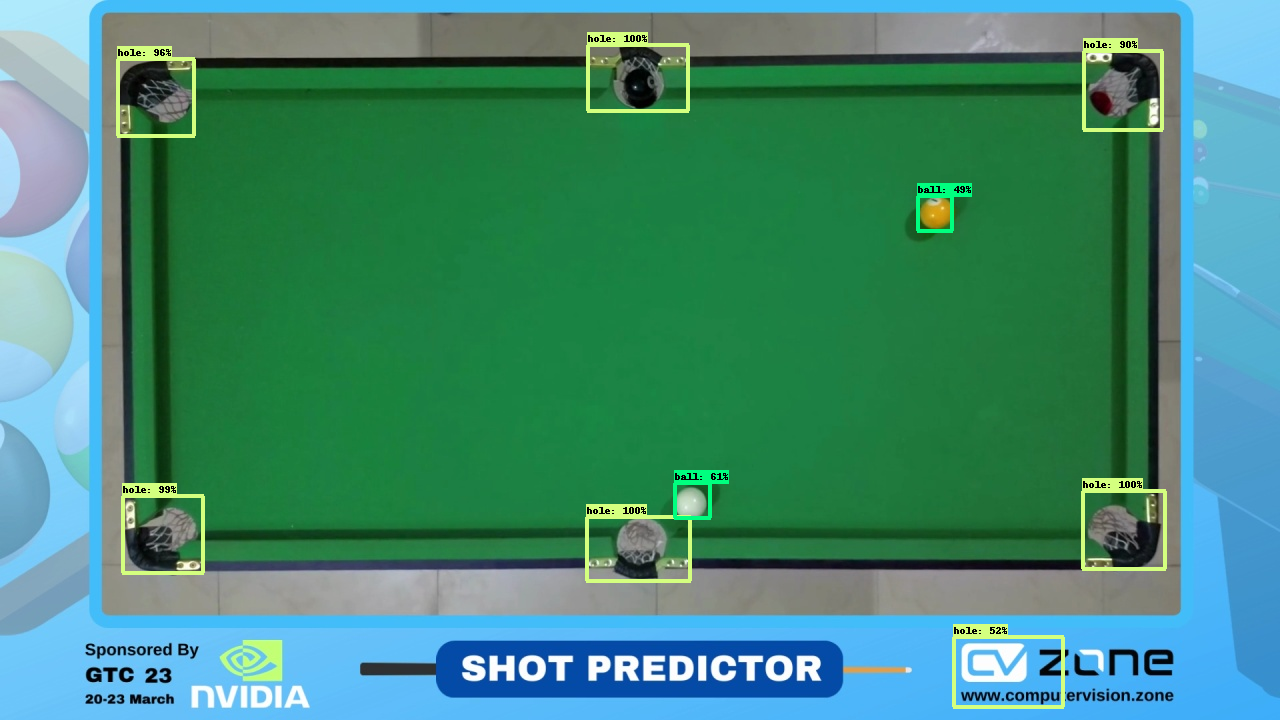

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)


# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = IMAGE_PATHS
print(IMAGE_PATHS)

# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = "/content/training_demo/exported-models/my_model"

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = "/content/training_demo/annotation/label_map.pbtxt"

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))



print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.45,
      agnostic_mode=False)

print('Done')

output_path = os.path.join('/content/detected_images', filename)
cv2.imwrite(output_path, image)

# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


In [ ]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU' or x.device_type == 'CPU']

get_available_devices()

['/device:CPU:0', '/device:GPU:0']